In [1]:
#Copyright 2022 Jesse Dimino, Benford's Law Fractal Geometry
#Data sets provided by Colin Fang

#packages needed to import
import os
import csv
import math
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats
import pandas as pd

In [2]:
#get the dataset
bm = pd.read_csv('bm_coeffs_10240_for_df.csv')

In [3]:
#drop all the zeros and reorder the indexes
bm = bm[bm["Numerator"] != '0']
bm = bm.reset_index(drop = True)

In [4]:
#add a column for decimal values
bm["Decimal"] = 0
for i in range(len(bm)):
    bm.at[i,"Decimal"] = int(bm.at[i,"Numerator"])/int(bm.at[i,"Denominator"])

In [5]:
data = bm.copy()

In [ ]:
#number of observations
len(data) 

In [6]:
#create a dataframe for the logarithms of the data
log = pd.DataFrame()
log["Num"] = [0 for i in range(len(data))]
log["Den"] = [0 for i in range(len(data))]
log["Dec"] = [0 for i in range(len(data))]
#create a dataframe for the logarithms of the data modulo 1
logmod1 = pd.DataFrame()
logmod1["Num"] = 0
logmod1["Den"] = 0
logmod1["Dec"] = 0

In [7]:
#generate log data
d = 0
for i in range(len(data)):
    d = abs(int(data.at[i,"Numerator"])) #set d equal to the ith data point
    d = math.log10(d) #compute its logarithm base 10
    log.at[i,'Num'] = d #store that value in the log dataframe
    d = d%1 #compute the value of the logarithm modulo 1
    logmod1.at[i,'Num'] = d #store that value in the logmod1 dataframe
    d = abs(int(data.at[i,"Denominator"]))
    d = math.log10(d)
    log.at[i,'Den'] = d
    d = d%1
    logmod1.at[i,'Den'] = d
    d = abs(float(data.at[i,"Decimal"]))
    d = math.log10(d)
    log.at[i,'Dec'] = d
    d=d%1
    logmod1.at[i,'Dec'] = d

In [8]:
#print the mean and standard deviation rounded to v decimal places
v = 3
print(round(log["Num"].mean(),v),round(log["Num"].std(),v))
print(round(log["Den"].mean(),v),round(log["Den"].std(),v))
print(round(log["Dec"].mean(),v),round(log["Dec"].std(),v))

1899.284 1793.752
1904.132 1793.994
-4.848 0.689


In [9]:
#initialize bins for the histograms
x = np.linspace(0,1,11)

Text(0, 0.5, 'pdf')

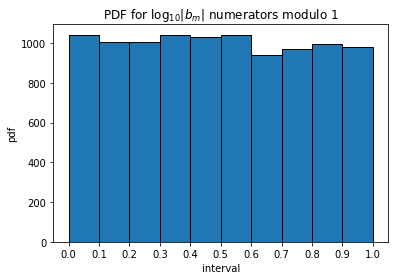

In [32]:
#plot the histograms for the data
fig, ax = plt.subplots()
l=plt.hist(logmod1['Num'],x,edgecolor = 'k',density=False)
ax.set_xticks(x, labels=['0.0', '0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.title("PDF for $\log_{10}{|b_m|}$ numerators modulo 1")
plt.xlabel('interval')
plt.ylabel('pdf')
#plt.savefig('PDFLogBMNum.eps') #save the figure

Text(0, 0.5, 'pdf')

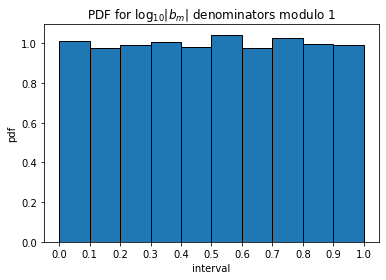

In [11]:
#plot the histograms for the data
fig, ax = plt.subplots()
plt.hist(logmod1['Den'],x,edgecolor = 'k',density=True)
ax.set_xticks(x, labels=['0.0', '0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.title("PDF for $\log_{10}{|b_m|}$ denominators modulo 1")
plt.xlabel('interval')
plt.ylabel('pdf')
#plt.savefig('PDFLogBMDen.eps') 

Text(0, 0.5, 'pdf')

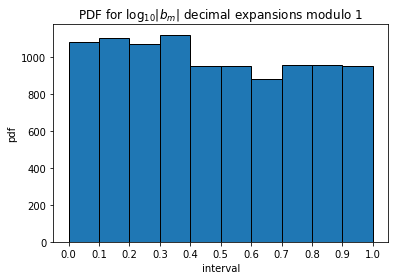

In [28]:
#plot the histograms for the data
fig, ax = plt.subplots()
l = plt.hist(logmod1['Dec'],x,edgecolor = 'k',density=False)
ax.set_xticks(x, labels=['0.0', '0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.title("PDF for $\log_{10}{|b_m|}$ decimal expansions modulo 1")
plt.xlabel('interval')
plt.ylabel('pdf')
#plt.savefig('PDFLogBMDec.eps')

In [54]:
critical = stats.chi2.isf(0.05, 9) #original threshold for significance
pvals = np.zeros(3) #vector to store p values
uniform = np.ones(10)#vector with shape for uniform distribution
critical

16.91897760462045

In [55]:
#get histogram counts for the numerators
h = np.histogram(logmod1['Num'],x,density=False)
#get the chi squared value
c = stats.chisquare(h[0],uniform*len(data)/10)
# p value for the numerator is stored
pvals[0] = c[1]
#display the chi square data
c

Power_divergenceResult(statistic=10.203464065299622, pvalue=0.3342662651851379)

In [56]:
#get histogram counts for the denominators
h = np.histogram(logmod1['Den'],x,density=False)
#get the chi squared value
c = stats.chisquare(h[0],uniform*len(data)/10)
# p value for the numerator is stored
pvals[1] = c[1]
#display the chi square data
c

Power_divergenceResult(statistic=4.416086004379852, pvalue=0.8819584518427179)

In [57]:
#get histogram counts for the decimals
h = np.histogram(logmod1['Dec'],x,density=False)
#get the chi squared value
c = stats.chisquare(h[0],uniform*len(data)/10)
# p value for the numerator is stored
pvals[2] = c[1]
#display the chi square data
c

Power_divergenceResult(statistic=60.75691817638861, pvalue=9.57981255841972e-10)

In [58]:
#Whether we reject the null hypothesis based on the results
pvals < 0.05

array([False, False,  True])